# Importing Required Libraries

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Features Used In The Model For Detecting Heart Deasease

In [2]:
# slope_of_peak_exercise_st_segment (type: int): the slope of the peak exercise ST segment, an electrocardiography read out indicating quality of blood flow to the heart
# thal (type: categorical): results of thallium stress test measuring blood flow to the heart, with possible values normal, fixed_defect, reversible_defect
# resting_blood_pressure (type: int): resting blood pressure
# chest_pain_type (type: int): chest pain type (4 values)
# num_major_vessels (ca) (type: int): number of major vessels (0-3) colored by flourosopy
# fasting_blood_sugar_gt_120_mg_per_dl (type: binary): fasting blood sugar > 120 mg/dl
# resting_ecg_results (type: int): resting electrocardiographic results (values 0,1,2)
# serum_cholesterol_mg_per_dl (type: int): serum cholestoral in mg/dl
# oldpeak_eq_st_depression (type: float): oldpeak = ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
# sex (type: binary): 0: female, 1: male
# age (type: int): age in years

# exercise_induced_angina (type: binary): exercise-induced chest pain (0: False, 1: True)

In [3]:
df = pd.read_csv('heart.csv')
df.tail(15) #displaying the data

,age,sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0


In [4]:
#exploring shape of the data
df.shape

(303, 14)

In [5]:
hdata=df.drop('thalach',axis='columns') # dropping the useless columns from the data
hdata 

,age,sex,cp,restbps,chol,fbs,restecg,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,1,1.2,1,1,3,0


In [6]:
hdata.describe() # statics of the data

,age,sex,cp,restbps,chol,fbs,restecg,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
print(hdata.info()) # checking if there is any null value in the data and types of all the data fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    int64  
 1   sex      303 non-null    int64  
 2   cp       303 non-null    int64  
 3   restbps  303 non-null    int64  
 4   chol     303 non-null    int64  
 5   fbs      303 non-null    int64  
 6   restecg  303 non-null    int64  
 7   exang    303 non-null    int64  
 8   oldpeak  303 non-null    float64
 9   slope    303 non-null    int64  
 10  ca       303 non-null    int64  
 11  thal     303 non-null    int64  
 12  target   303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB
None


<AxesSubplot:>

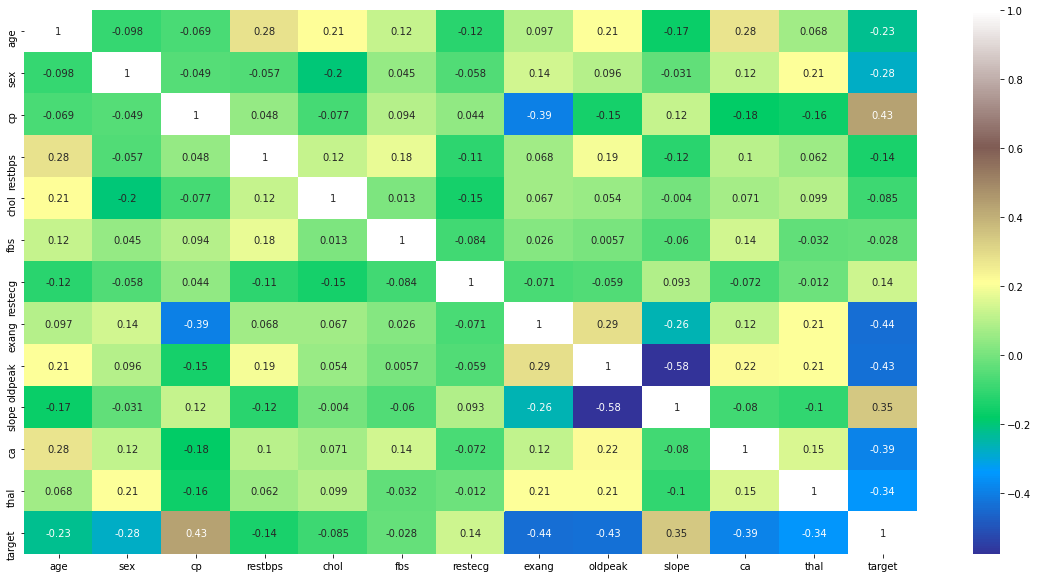

In [8]:
# Finding the correlation among the attributes
plt.figure(figsize=(20,10))
sns.heatmap(hdata.corr(), annot=True, cmap='terrain')
#we observe positive correlation between target and cp,slope and also negative correlation between target and sex, exang,ca,thai,oldpeak

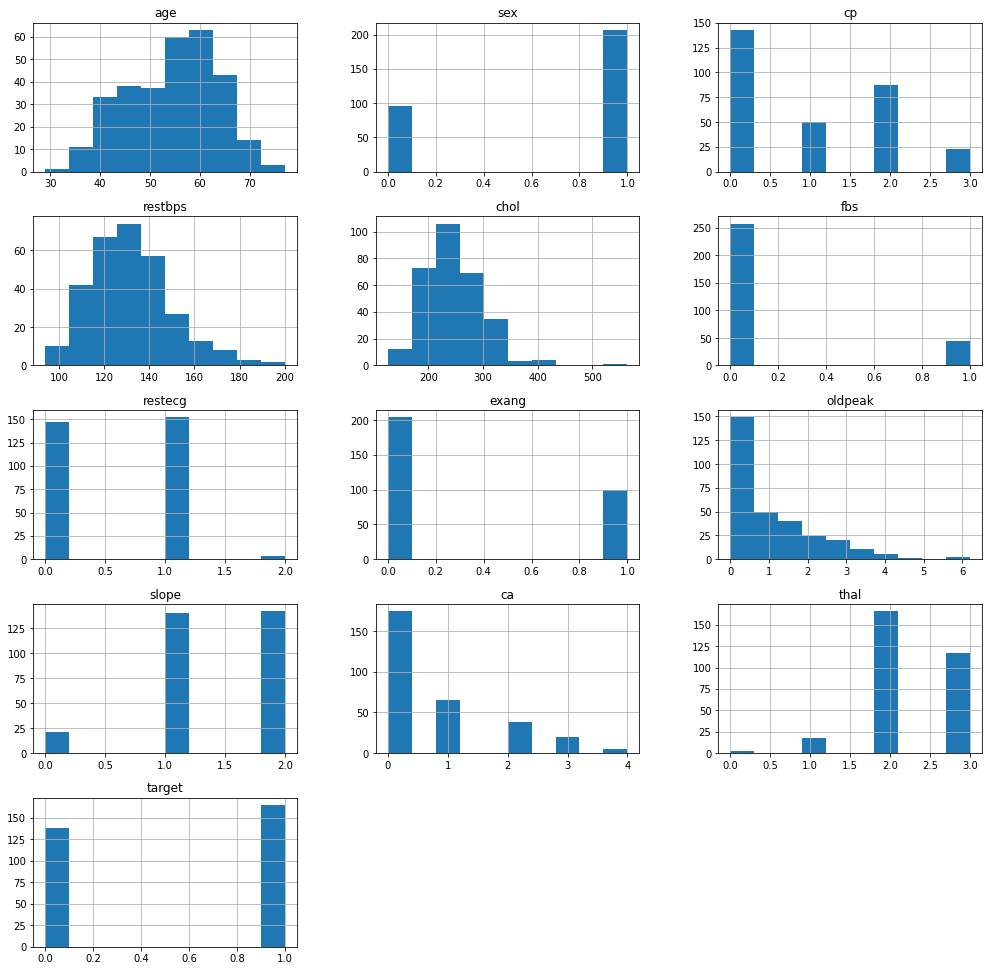

In [9]:
hdata.hist(figsize=(17,17), layout=(5,3)); # visulazing the parameters values in dividing them in group

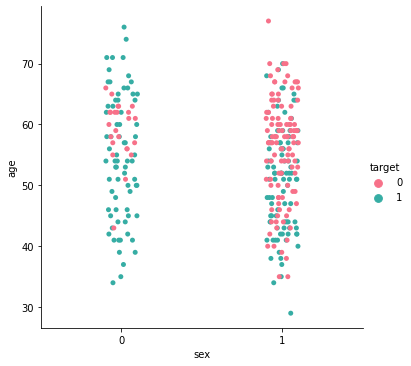

In [10]:
sns.catplot(data=hdata, x='sex', y='age',  hue='target', palette='husl') # features that leads toward disease or no disease

<AxesSubplot:xlabel='sex', ylabel='fbs'>

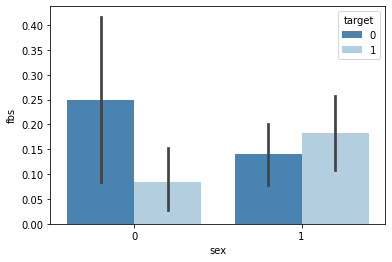

In [11]:
sns.barplot(data=hdata, x='sex', y='fbs', hue='target', palette='Blues_r')

Occurence of heart desase in fasting blood sugar women is less than men

<AxesSubplot:xlabel='sex', ylabel='count'>

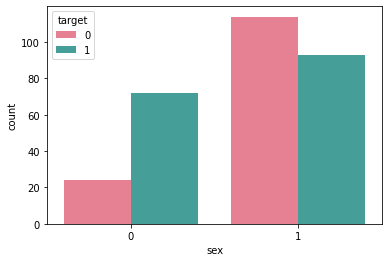

In [12]:
sns.countplot(x='sex', data=hdata, palette='husl', hue='target')

female having heart disease are comparatively less when compared to males Males have low heart diseases as compared to females in the given dataset.

<AxesSubplot:xlabel='ca', ylabel='count'>

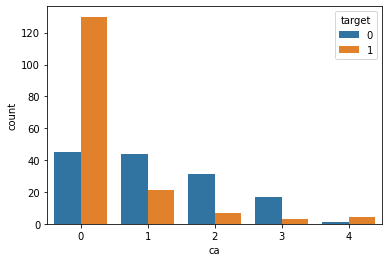

In [13]:
sns.countplot(x='ca',hue='target',data=hdata)

ca is number of blood vessels.when ca will increase we witness a drop in heart diseases and vice versa.

<AxesSubplot:xlabel='thal', ylabel='count'>

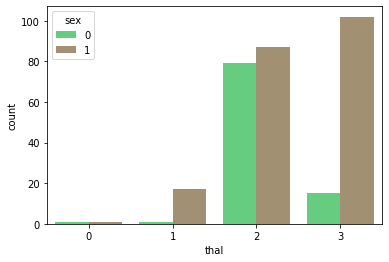

In [14]:
sns.countplot(x='thal', hue='sex',data=df, palette='terrain')

<AxesSubplot:xlabel='cp', ylabel='count'>

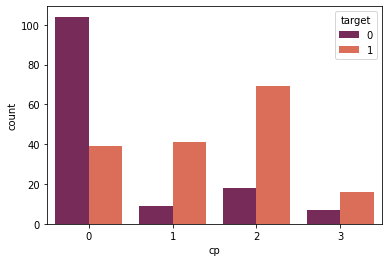

In [15]:
sns.countplot(x='cp' ,hue='target', data=df, palette='rocket')

Here we can see those having chest pain type 2 have high heart desease cases

Text(0.5, 1.0, 'Chest Pain Count Experienced by Male and Female')

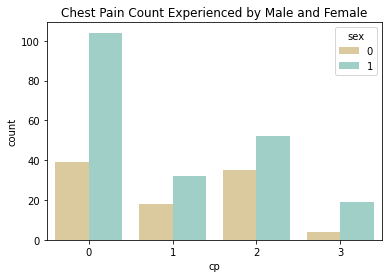

In [16]:
sns.countplot(x='cp', hue='sex',data=df, palette='BrBG').set_title("Chest Pain Count Experienced by Male and Female")


<AxesSubplot:xlabel='sex', ylabel='oldpeak'>

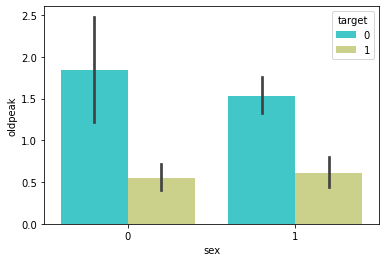

In [17]:
sns.barplot(x='sex', y='oldpeak', hue='target', palette='rainbow', data=hdata)

According to the above women have slightly high depression than men but the heart desease rate is same in both w.r.t depression

# Cross Tables

<AxesSubplot:xlabel='sex'>

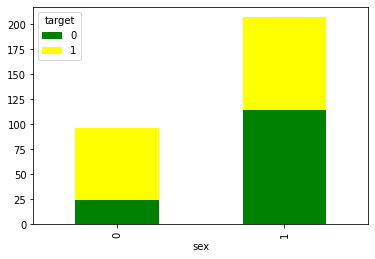

In [18]:
gen = pd.crosstab(hdata['sex'], hdata['target'])
gen.plot(kind='bar', stacked=True, color=['green','yellow'], grid=False)

<AxesSubplot:xlabel='cp'>

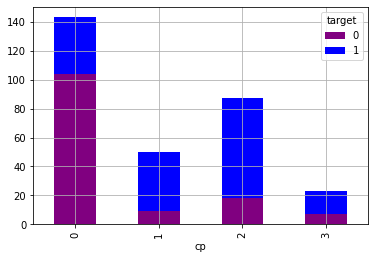

In [19]:
chest_pain = pd.crosstab(hdata['cp'], hdata['target'])
chest_pain.plot(kind='bar', stacked=True, color=['purple','blue'], grid=True)

# Preparing the data for Model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()                         # Standardizing the Data
columns_to_scale = ['age','restbps','chol','oldpeak']
hdata[columns_to_scale] = StandardScaler.fit_transform(hdata[columns_to_scale])
hdata.head()

,age,sex,cp,restbps,chol,fbs,restecg,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,1,-0.379244,2,0,2,1


In [23]:
X= hdata.drop(['target'], axis=1)
y= hdata['target']

In [24]:
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [25]:
# Checking the training and testing data size

print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 2544
X_test- 1092
y_train- 212
y_test- 91


# Checking the Best Algorithm 

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

model1=lr.fit(X_train,y_train)
prediction1=model1.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction1)
cm 

array([[36,  4],
       [ 3, 48]], dtype=int64)

So we got 7 error values by applying logistic regression model

<AxesSubplot:>

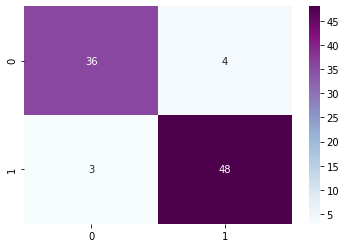

In [28]:
sns.heatmap(cm, annot=True,cmap='BuPu')

In [34]:
from sklearn.metrics import accuracy_score
a1=accuracy_score(y_test,prediction1)
a1

0.9230769230769231

# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
model2=dtc.fit(X_train,y_train)
prediction2=model2.predict(X_test)
cm2= confusion_matrix(y_test,prediction2)
cm2

array([[33,  7],
       [14, 37]], dtype=int64)

In [36]:
a2=accuracy_score(y_test,prediction2)
a2

0.7692307692307693

# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier()
model3 = rfc.fit(X_train, y_train)
prediction3 = model3.predict(X_test)
confusion_matrix(y_test, prediction3)

array([[33,  7],
       [ 7, 44]], dtype=int64)

In [38]:
a3=accuracy_score(y_test, prediction3)
a3

0.8461538461538461

# Support Vector Machine

In [43]:
from sklearn.svm import SVC

svm=SVC()
model4=svm.fit(X_train,y_train)
prediction4=model4.predict(X_test)
cm4= confusion_matrix(y_test,prediction4)
cm4

array([[32,  8],
       [ 3, 48]], dtype=int64)

In [44]:
a4=accuracy_score(y_test, prediction4)
a4

0.8791208791208791

In [50]:
# Now Compairing the accuracies of different models

Model_Comparison = pd.DataFrame({'Model': ['Logistic Regression','Decision Tree','Random Forest','Support Vector Machine'],
    'Score': [a1, a2, a3, a4]})
Model_Comparison_df = Model_Comparison.sort_values(by='Score', ascending=False)
Model_Comparison_df = Model_Comparison_df.set_index('Score')
Model_Comparison_df.reset_index()


,Score,Model
0,0.923077,Logistic Regression
1,0.879121,Support Vector Machine
2,0.846154,Random Forest
3,0.769231,Decision Tree


So by applying different models it is found out that logistic regression is the best model for this predicition data.
